# Read a sample .txt file, and perform preprocessing.

### The first step would be to do some text preprocessing (i.e. sentence tokenization) and then doing some sentence embeddings to turn the sentence into vectorized format.

In [1]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re                      # Regular expressions
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dropout,  Dense, Activation,Add, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\R-k-l\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\R-k-l\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R-k-l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
with open('the_boy_who_cried_wolf.txt', 'r') as file:
    text = file.read().replace('\n', '')
    file.close()
text

'A Shepherd Boy tended his master\'s Sheep near a dark forest not far from the village. Soon he found life in the pasture very dull. All he could do to amuse himself was to talk to his dog or play on his shepherd\'s pipe. One day as he sat watching the Sheep and the quiet forest, and thinking what he would do should he see a Wolf, he thought of a plan to amuse himself. His Master had told him to call for help should a Wolf attack the flock, and the Villagers would drive it away. So now, though he had not seen anything that even looked like a Wolf, he ran toward the village shouting at the top of his voice, "Wolf! Wolf!" As he expected, the Villagers who heard the cry dropped their work and ran in great excitement to the pasture. But when they got there they found the Boy doubled up with laughter at the trick he had played on them. A few days later the Shepherd Boy again shouted, "Wolf! Wolf!" Again the Villagers ran to help him, only to be laughed at again. Then one evening as the sun 

### Perform the following tasks on the data:
- Convert everything to lowercase
- Remove HTML tags
- Contraction mapping
- Remove (‘s)
- Remove any text inside the parenthesis ( )
- Eliminate punctuations and special characters
- Remove stopwords
- Remove shortwords

In [3]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [4]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    """
    text (str): a string of text that can be multiple sentences to be parsed into a token stream. 
    Returns: a cleaned string of text
    """
    newString = text.lower()
    newString = BeautifulSoup(newString, exclude_encodings="lxml").text # removes html/xml taggs
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()


In [5]:
text = text_cleaner(text)
print(type(text))
text

<class 'str'>


'shepherd boy tended master sheep near dark forest far village soon found life pasture dull could amuse talk dog play shepherd pipe one day sat watching sheep quiet forest thinking would see wolf thought plan amuse master told call help wolf attack flock villagers would drive away though seen anything even looked like wolf ran toward village shouting top voice wolf wolf expected villagers heard cry dropped work ran great excitement pasture got found boy doubled laughter trick played days later shepherd boy shouted wolf wolf villagers ran help laughed one evening sun setting behind forest shadows creeping pasture wolf really spring underbrush fall upon sheep terror boy ran toward village shouting wolf wolf though villagers heard cry run help cannot fool said wolf killed great many boy sheep slipped away forest'

## Tokenize, Sequence, Pad

In [6]:
# s_token = sent_tokenize(text)
# s_token
# Convert text to a one length string
text_l=[]
text_l.append(text)
text=text_l
del text_l
print(len(list(text)))
print(type(text[0]))

1
<class 'str'>


## Import data to train model on in csv format

In [7]:
df_art_sum = pd.read_csv("train_model_files/article_summary_and_article_title/train_ds_80.csv")
# bbc_art_sum.drop("Unnamed: 0", axis=1, inplace=True)
print(df_art_sum.shape)
df_art_sum.head()

(80, 2)


,article,title
0,african union chairman and south african president thabo mbeki on saturday received a report on allegations of a renewed standoff between belligerent parties in the democratic republic of the cong...,s. african president receives fact-finding report on congo
1,u.n. secretary-general ban ki-moon said sunday he is hopeful `` a turning point '' had been reached in tackling myanmar 's cyclone crisis as an international conference convened to pledge funds fo...,international conference pledging aid to myanmar s cyclone victims
2,"at least ## people have been killed in fighting between gangs from two of kenya 's main tribes in a poor nairobi neighborhood , police said monday .",at least ## people killed in fighting between tribal gangs in nairobi
3,"after a rare second-place finish in a tour de france time-trial , lance armstrong says he now knows he 's facing competition .",armstrong wakes up to competition after failing to win tour time-trial
4,"a special nato advance team started its mission in macedonia on saturday , laying the groundwork for the arrival of several thousand troops charged with collecting weapons from ethnic albanian reb...",nato advance forces arrive to prepare for rebel arms-collection


## Tokenize list data into sequences

In [9]:
from keras.preprocessing.text import Tokenizer
# articles = list(df_art_sum.row_article)
articles = list(df_art_sum.article)
# summaries = list(df_art_sum.summary)
summaries = list(df_art_sum.title)


# Article data
VOCAB_SIZE = 999
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(articles)
article_sequences = tokenizer.texts_to_sequences(articles)
art_word_index = tokenizer.word_index
print(len(art_word_index))

art_word_index_1500 = {}
counter = 0
for word in art_word_index.keys():
    if art_word_index[word] == 0:
        print("found 0!")
        break
    if art_word_index[word] > VOCAB_SIZE:
        continue
    else:
        art_word_index_1500[word] = art_word_index[word]
        counter += 1
print(counter)

# Summary data
tokenizer.fit_on_texts(summaries)
summary_sequences = tokenizer.texts_to_sequences(summaries)
sum_word_index = tokenizer.word_index
print(len(sum_word_index))

sum_word_index_1500 = {}
counter = 0
for word in sum_word_index.keys():
    if sum_word_index[word] == 0:
        print("found 0!")
        break
    if sum_word_index[word] > VOCAB_SIZE:
        continue
    else:
        sum_word_index_1500[word] = sum_word_index[word]
        counter += 1
print(counter)

1175
999
1309
999


In [10]:
art_word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'to': 4,
 'in': 5,
 'and': 6,
 "'s": 7,
 'on': 8,
 'said': 9,
 'for': 10,
 'that': 11,
 'with': 12,
 'an': 13,
 'from': 14,
 'president': 15,
 'as': 16,
 'at': 17,
 'wednesday': 18,
 'friday': 19,
 'after': 20,
 'thursday': 21,
 'lrb': 22,
 'rrb': 23,
 'will': 24,
 'by': 25,
 'u': 26,
 'monday': 27,
 'has': 28,
 'tuesday': 29,
 'year': 30,
 'sunday': 31,
 "''": 32,
 'two': 33,
 'would': 34,
 'this': 35,
 'is': 36,
 'were': 37,
 'new': 38,
 'be': 39,
 'week': 40,
 'was': 41,
 'he': 42,
 'million': 43,
 'have': 44,
 'taiwan': 45,
 'bush': 46,
 'government': 47,
 'which': 48,
 'official': 49,
 'it': 50,
 'are': 51,
 'his': 52,
 'state': 53,
 'saturday': 54,
 'been': 55,
 'team': 56,
 'its': 57,
 'up': 58,
 'unk': 59,
 'one': 60,
 'here': 61,
 'last': 62,
 'next': 63,
 'us': 64,
 'five': 65,
 'officials': 66,
 'who': 67,
 's': 68,
 'south': 69,
 'n': 70,
 'country': 71,
 'political': 72,
 'spokesman': 73,
 'they': 74,
 'ministry': 75,
 'reported': 76,
 'unite

In [11]:
art_word_index_1500

{'the': 1,
 'of': 2,
 'a': 3,
 'to': 4,
 'in': 5,
 'and': 6,
 "'s": 7,
 'on': 8,
 'said': 9,
 'for': 10,
 'that': 11,
 'with': 12,
 'an': 13,
 'from': 14,
 'president': 15,
 'as': 16,
 'at': 17,
 'wednesday': 18,
 'friday': 19,
 'after': 20,
 'thursday': 21,
 'lrb': 22,
 'rrb': 23,
 'will': 24,
 'by': 25,
 'u': 26,
 'monday': 27,
 'has': 28,
 'tuesday': 29,
 'year': 30,
 'sunday': 31,
 "''": 32,
 'two': 33,
 'would': 34,
 'this': 35,
 'is': 36,
 'were': 37,
 'new': 38,
 'be': 39,
 'week': 40,
 'was': 41,
 'he': 42,
 'million': 43,
 'have': 44,
 'taiwan': 45,
 'bush': 46,
 'government': 47,
 'which': 48,
 'official': 49,
 'it': 50,
 'are': 51,
 'his': 52,
 'state': 53,
 'saturday': 54,
 'been': 55,
 'team': 56,
 'its': 57,
 'up': 58,
 'unk': 59,
 'one': 60,
 'here': 61,
 'last': 62,
 'next': 63,
 'us': 64,
 'five': 65,
 'officials': 66,
 'who': 67,
 's': 68,
 'south': 69,
 'n': 70,
 'country': 71,
 'political': 72,
 'spokesman': 73,
 'they': 74,
 'ministry': 75,
 'reported': 76,
 'unite

## Pad sequences, used in model building

In [12]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 50
pad_art_sequences = pad_sequences(article_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
pad_sum_sequences = pad_sequences(summary_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
print(len(article_sequences[1]), len(pad_art_sequences[1]))
print(pad_art_sequences.shape)
pad_art_sequences

41 50
(80, 50)


array([[154, 299, 300, ...,   0,   0,   0],
       [ 26,  70,  86, ...,   0,   0,   0],
       [ 17, 325,  90, ...,   0,   0,   0],
       ...,
       [ 28,   5, 298, ...,   0,   0,   0],
       [  7,  15,  67, ...,   0,   0,   0],
       [  5,   3, 125, ...,   0,   0,   0]])

## Use padded sequences to manually create inputs to encoder and decoders

In [13]:
# shape = (pad_art_sequences.shape[0], pad_art_sequences.shape[1])
# encoder_inputs = np.zeros(shape, dtype='float32')
# encoder_inputs.shape

# decoder_inputs = np.zeros(shape, dtype='float32')
# decoder_inputs.shape

# for i, seqs in enumerate(pad_art_sequences):
#     for j, seq in enumerate(seqs):
#         encoder_inputs[i, j] = seq
        
# for i, seqs in enumerate(pad_sum_sequences):
#     for j, seq in enumerate(seqs):
#         decoder_inputs[i, j] = seq

## Embedding layers using GloVe

In [14]:
# import time
# timer_start = time.time()
# embeddings_index = {}
# with open('../glove.6B.200d.txt', encoding='utf-8') as f: # local path
#     for line in f:
#         values = line.split()
#         word = values[0]
#         coefs = np.asarray(values[1:], dtype='float32')
#         embeddings_index[word] = coefs
#     f.close()

# print('Found %s word vectors.' % len(embeddings_index))
# print("Creating embeddings_index took", round(time.time() - timer_start, 1), "seconds.")
# del timer_start

In [15]:
from load_glove_embeddings import load_glove_embeddings # local function from .py file
glove_dimension = 50
import time
timer_start = time.time()
word2index, embedding_matrix = load_glove_embeddings('../glove.6B.'+str(glove_dimension)+'d.txt', embedding_dim=glove_dimension, include_empty_char=False)
print('Found %s word vectors.' % len(word2index))
print("Creating embeddings_index took", round(time.time() - timer_start, 1), "seconds.")
del timer_start

Found 400000 word vectors.
Creating embeddings_index took 11.6 seconds.


In [16]:
embedding_matrix

array([[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.013441  ,  0.23682   , -0.16899   , ..., -0.56656998,
         0.044691  ,  0.30392   ],
       [ 0.15164   ,  0.30177   , -0.16763   , ..., -0.35652   ,
         0.016413  ,  0.10216   ],
       ...,
       [-0.51181   ,  0.058706  ,  1.09130001, ..., -0.25003001,
        -1.125     ,  1.58630002],
       [-0.75897998, -0.47426   ,  0.47369999, ...,  0.78953999,
        -0.014116  ,  0.64480001],
       [ 0.072617  , -0.51393002,  0.47279999, ..., -0.18907   ,
        -0.59021002,  0.55558997]])

In [17]:
word2index

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

In [18]:
def embedding_matrix_creater(embedding_dimention, word_index):
    local_embedding_matrix = np.zeros((len(word_index) + 1, embedding_dimention))
    for word, i in word_index.items():
        embedding_vector = word2index.get(word) # from cell above. 
        if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
            local_embedding_matrix[i] = embedding_vector
    return local_embedding_matrix

In [19]:
art_embedding_matrix = embedding_matrix_creater(glove_dimension, word_index=art_word_index_1500) 
print(art_embedding_matrix.shape)

sum_embedding_matrix = embedding_matrix_creater(glove_dimension, word_index=sum_word_index_1500)
print(sum_embedding_matrix.shape)

encoder_embedding_layer = Embedding(input_dim = int(art_embedding_matrix.shape[0]), # vocab size
                                    output_dim = int(art_embedding_matrix.shape[1]), # embedding dimension
                                    input_length = MAX_LEN,
                                    weights = [art_embedding_matrix],
                                    trainable = False)

decoder_embedding_layer = Embedding(input_dim = int(sum_embedding_matrix.shape[0]), 
                                    output_dim = int(sum_embedding_matrix.shape[1]),
                                    input_length = MAX_LEN,
                                    weights = [sum_embedding_matrix],
                                    trainable = False)

(1000, 50)
(1000, 50)


In [20]:
art_embedding_matrix

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 3.0000e+00, 3.0000e+00, ..., 3.0000e+00, 3.0000e+00,
        3.0000e+00],
       ...,
       [1.6693e+04, 1.6693e+04, 1.6693e+04, ..., 1.6693e+04, 1.6693e+04,
        1.6693e+04],
       [4.8630e+03, 4.8630e+03, 4.8630e+03, ..., 4.8630e+03, 4.8630e+03,
        4.8630e+03],
       [4.8900e+02, 4.8900e+02, 4.8900e+02, ..., 4.8900e+02, 4.8900e+02,
        4.8900e+02]])

In [21]:
# https://jovianlin.io/embeddings-in-keras/
# import numpy as np
# from load_glove_embeddings import load_glove_embeddings # local function from .py file
# import re
# import numpy as np
# from keras.preprocessing.sequence import pad_sequences
# from keras.preprocessing.text import one_hot
# from keras.models import Sequential
# from keras.layers import Embedding, Flatten, Dense
# from keras.models import Model
# from keras.layers import Input

# embedding_layer = Embedding(input_dim=embedding_matrix.shape[0],
#                             output_dim=embedding_matrix.shape[1], 
#                             input_length=MAX_LEN,
#                             weights=[embedding_matrix], 
#                             trainable=False, 
#                             name='embedding_layer')

# i = Input(shape=(MAX_LEN,), dtype='int32', name='main_input')
# x = embedding_layer(i)
# x = Flatten()(x)
# o = Dense(1, activation='sigmoid')(x)

In [22]:
# Hyperparamters

# MAX_LEN = 250
VOCAB_SIZE = 1000
EMBEDDING_DIM = 50
HIDDEN_UNITS = 200


LEARNING_RATE = 0.002
BATCH_SIZE = 32
EPOCHS = 10

In [23]:
VOCAB_SIZE = VOCAB_SIZE + 1
VOCAB_SIZE

1001

## Model architecture finished. Train and validate the model. 

In [26]:
num_samples = len(pad_sum_sequences)
decoder_output_data = np.zeros((num_samples, MAX_LEN, VOCAB_SIZE), dtype="int32")

In [27]:
for i, seqs in enumerate(pad_sum_sequences):
    for j, seq in enumerate(seqs):
        if j > 0:
            decoder_output_data[i][j][seq] = 1

In [28]:
from sklearn.model_selection import train_test_split
art_train, art_test, sum_train, sum_test = train_test_split(pad_art_sequences, pad_sum_sequences, test_size=0.2)
# X_train, X_test, y_train, y_test

In [29]:
train_num = art_train.shape[0]
train_num

64

In [30]:
target_train = decoder_output_data[:train_num]
target_test = decoder_output_data[train_num:]

In [31]:
type([art_train, sum_train])

list

In [32]:
target_train.shape

(64, 50, 1001)

In [34]:
art_train

array([[  1, 114,  47, ...,   0,   0,   0],
       [  1,  47,   2, ...,   0,   0,   0],
       [627, 628, 629, ...,   0,   0,   0],
       ...,
       [767,  24, 768, ...,   0,   0,   0],
       [120,  10, 161, ...,   0,   0,   0],
       [223,  15, 563, ...,   0,   0,   0]])

In [35]:
"""
Bidirectional LSTM: Others Inspired Encoder-Decoder-seq2seq
"""
encoder_inputs = Input(shape=(MAX_LEN,))
encoder_embedding = encoder_embedding_layer(encoder_inputs)
encoder_LSTM = LSTM(HIDDEN_UNITS, return_state=True)
encoder_LSTM_R = LSTM(HIDDEN_UNITS, return_state=True, go_backwards=True)
encoder_outputs_R, state_h_R, state_c_R = encoder_LSTM_R(encoder_embedding)
encoder_outputs, state_h, state_c = encoder_LSTM(encoder_embedding)

final_h = Add()([state_h, state_h_R])
final_c = Add()([state_c, state_c_R])
encoder_states = [final_h, final_c]

"""
decoder
"""
decoder_inputs = Input(shape=(MAX_LEN,))
decoder_embedding = decoder_embedding_layer(decoder_inputs)
decoder_LSTM = LSTM(HIDDEN_UNITS, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_LSTM(decoder_embedding, initial_state=encoder_states) 
decoder_dense = Dense(VOCAB_SIZE, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

model= Model(inputs=[encoder_inputs,decoder_inputs], outputs=decoder_outputs)

In [36]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy") 
# I am using sparse categorical cross-entropy as the loss function since it converts the integer sequence to a one-hot vector on the fly. This overcomes any memory issues.

In [37]:
from tensorflow.keras.optimizers import RMSprop
rmsprop = RMSprop(lr=0.01, clipnorm=1.)
model.compile(loss='mse', optimizer=rmsprop, metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 50)       50000       input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 200), (None, 200800      embedding[0][0]                  
______________________________________________________________________________________________

In [38]:
history = model.fit([art_train, sum_train], 
                     target_train, 
                     epochs=EPOCHS, # will implement early stopping, see callbacks. 
                     batch_size=BATCH_SIZE,
                     callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1)],
                     validation_data=([art_test, sum_test], target_test))

Train on 64 samples, validate on 16 samples
Epoch 1/10
64/64 [==============================] - 6s 96ms/sample - loss: 0.0110 - accuracy: 0.2784 - val_loss: 0.0136 - val_accuracy: 0.6325
Epoch 2/10
64/64 [==============================] - 0s 8ms/sample - loss: 0.0097 - accuracy: 0.3244 - val_loss: 0.0069 - val_accuracy: 0.2750
Epoch 3/10
64/64 [==============================] - 0s 7ms/sample - loss: 0.0057 - accuracy: 0.4919 - val_loss: 0.0023 - val_accuracy: 0.7125
Epoch 4/10
64/64 [==============================] - 0s 7ms/sample - loss: 0.0018 - accuracy: 0.7950 - val_loss: 0.0010 - val_accuracy: 0.8800
Epoch 5/10
64/64 [==============================] - 0s 8ms/sample - loss: 9.9901e-04 - accuracy: 0.8853 - val_loss: 6.8146e-04 - val_accuracy: 0.8800
Epoch 6/10
64/64 [==============================] - 0s 8ms/sample - loss: 6.0660e-04 - accuracy: 0.8884 - val_loss: 4.5169e-04 - val_accuracy: 0.8800
Epoch 7/10
64/64 [==============================] - 0s 8ms/sample - loss: 5.1795e-04 - 

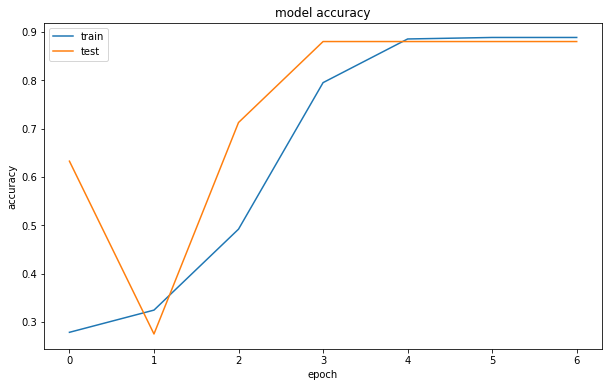

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

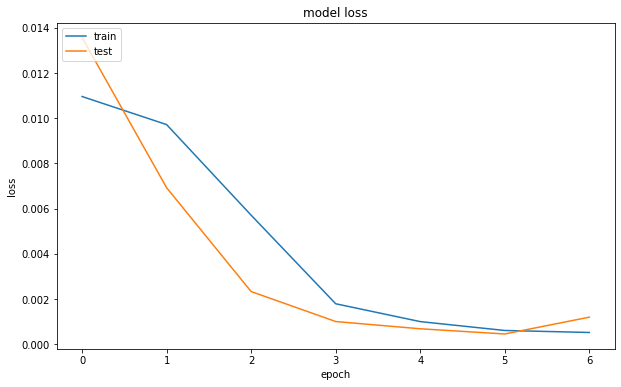

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
history.history

{'loss': [0.010957748861983418,
  0.009716381784528494,
  0.005706283263862133,
  0.0017883183900266886,
  0.0009990102262236178,
  0.0006066044443286955,
  0.0005179466097615659],
 'accuracy': [0.2784375,
  0.324375,
  0.491875,
  0.795,
  0.8853125,
  0.8884375,
  0.8884375],
 'val_loss': [0.013570892624557018,
  0.006922572385519743,
  0.0023278784938156605,
  0.001002368051558733,
  0.0006814644439145923,
  0.00045169179793447256,
  0.0011958717368543148],
 'val_accuracy': [0.6325, 0.275, 0.7125, 0.88, 0.88, 0.88, 0.88]}

In [41]:
"""
# Save model.
with open('text_summary.json',"w").write(model.to_json())
model.load_weights('text_summary.h5')
print("Saved Model!")
"""

'\n# Save model.\nwith open(\'text_summary.json\',"w").write(model.to_json())\nmodel.load_weights(\'text_summary.h5\')\nprint("Saved Model!")\n'

In [44]:
reverse_source_word_index=x_tokenizer.index_word 
art_train[0]

array([  1, 114,  47,   9,  18,  11,  50,  34, 132,   4, 127,   1,   2,
         3, 114, 142,  67, 115,  29, 187,  20, 259,  25, 254,  95,   5,
         1,  62,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])